In [1]:
import os
import sys
import pandas as pd
import numpy as np


In [99]:
src_path = os.path.abspath(os.path.join(os.getcwd(),"../"))
sys.path.append(src_path)
try:
    from src.backtester import single_name_backtester
    from src.visualize import plot_wealth_path
except ImportError as e:
    print('Custom modules not found. Please ensure src/ is available.')
    print('ImportError:', e)    


In [ ]:
data_file = "../data/processed/core_assets_master.csv"
master_df = pd.read_csv(data_file, index_col = "Date")
master_df.index = pd.to_datetime(master_df.index)

#print(master_df.info())

In [11]:
sp500_df = master_df[["sp500_Price", "sp500_Dividend", "sp500_Price_Return", "sp500_Total_Return", "CPI"]].round(6)
sp500_df.tail()

,sp500_Price,sp500_Dividend,sp500_Price_Return,sp500_Total_Return,CPI
Date,,,,,
2025-08-31,6408.949524,78.103333,0.017859,0.018893,323.976
2025-09-30,6584.018095,78.480000,0.027316,0.028337,324.800
2025-10-31,6735.691739,78.626720,0.023037,0.024032,325.212
2025-11-30,6740.885789,78.773440,0.000771,0.001746,324.122
2025-12-31,6853.025455,78.920160,0.016636,0.017611,323.577


In [101]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
start_date = "01-01-2020" 
end_date = None
initial_investment = 1.0
# This cell runs the backtester for the S&P 500 using the specified start and end dates,
# initial investment, CPI for real wealth calculation, and sets real_wealth=True.


# The configuration demonstrates a real (inflation-adjusted) wealth path 
# for a buy-and-hold strategy with full reinvestment of dividends.



sp500_wealth_path = single_name_backtester(
    sp500_df,  start_date, end_date, 
    initial_investment= initial_investment, 
    cpi= sp500_df["CPI"], 
    asset_name ="sp500", 
    real_wealth=True)

# The configuration below now demonstrates a nominal wealth path 
# for a buy-and-hold strategy without reinvestment of dividends.
# It shows how the wealth path looks in nominal terms only. 


sp500_wealth_path_acc = single_name_backtester(
    sp500_df, start_date, end_date, 
    initial_investment= initial_investment, 
    asset_name ="sp500", is_accumulated=True)

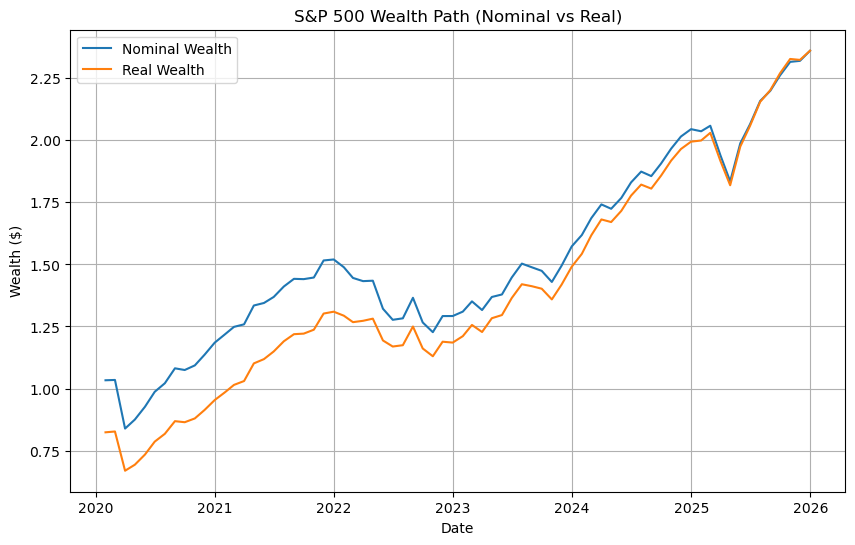

In [ ]:
# plot configs for nominal vs real wealth path comparison
# Case of full reinvestment of dividends. 

columns_to_plot = ["sp500_nominal_wealth", "sp500_real_wealth"]
title = "S&P 500 Wealth Path (Nominal vs Real)"
labels = {"sp500_nominal_wealth": "Nominal Wealth", "sp500_real_wealth": "Real Wealth"}
plot_wealth_path(sp500_wealth_path, columns_to_plot, labels, title)

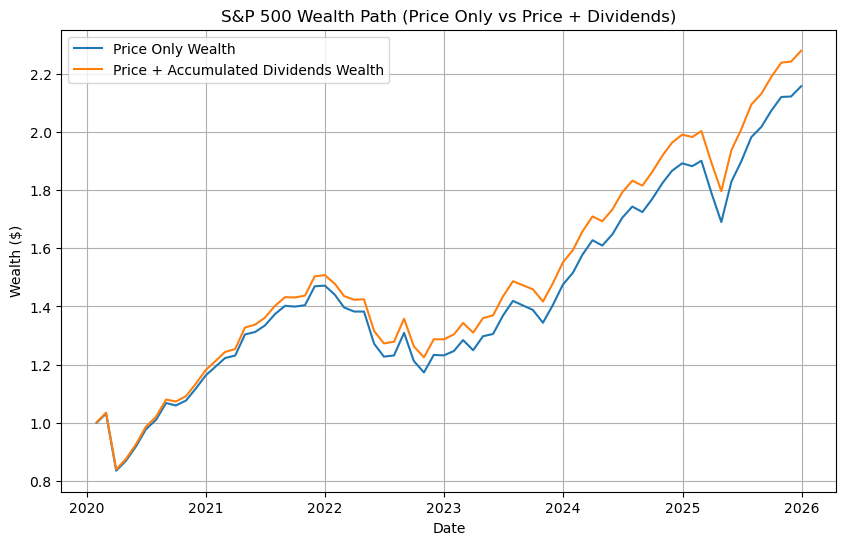

In [107]:
# plot configs
# Case without reinvestment of dividends.
# Compare price only wealth path vs price wealth + accumulated dividends wealth path in nominal terms.
# This shows the impact of dividends on wealth accumulation over time.
columns_to_plot_acc = ["sp500_price_wealth", "sp500_nominal_wealth"]
title_acc = "S&P 500 Wealth Path (Price Only vs Price + Dividends)"
labels_acc = {"sp500_price_wealth": "Price Only Wealth", "sp500_nominal_wealth": "Price + Accumulated Dividends Wealth"}
plot_wealth_path(sp500_wealth_path_acc, columns_to_plot_acc, labels_acc, title_acc)